In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
#data
x_train = np.random.normal(1, 0.1, 100)
y_train = np. repeat(10., 100)

In [3]:
print(y_train)

[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


In [4]:
#create placeholder
x_holder = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_holder = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [5]:
#create w variable and bias b
w = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.zeros([1,1]))

In [6]:
batch_size = 16
output = tf.add(tf.multiply(w, x_holder), b)
loss = tf.reduce_mean(tf.square(output-y_holder))
opt = tf.train.GradientDescentOptimizer(0.05)
train_step = opt.minimize(loss)

In [7]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())
loss_batch = []
for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_train[rand_index]])
    rand_y = np.transpose([y_train[rand_index]])
    sess.run(train_step, feed_dict={x_holder: rand_x, y_holder: rand_y})
    
    if (i)%5==0:
        print("#Step:", i)
        temp_loss = sess.run(loss, feed_dict={x_holder: rand_x, y_holder: rand_y})
        print("Loss= ", str(temp_loss))
        loss_batch.append(temp_loss)
    
sess.close()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
#Step: 0
Loss=  61.500736
#Step: 5
Loss=  7.317216
#Step: 10
Loss=  0.7642521
#Step: 15
Loss=  0.27105162
#Step: 20
Loss=  0.2703771
#Step: 25
Loss=  0.25470755
#Step: 30
Loss=  0.27216274
#Step: 35
Loss=  0.18495311
#Step: 40
Loss=  0.20335832
#Step: 45
Loss=  0.29455346
#Step: 50
Loss=  0.22561032
#Step: 55
Loss=  0.21279022
#Step: 60
Loss=  0.21733804
#Step: 65
Loss=  0.16533387
#Step: 70
Loss=  0.22440913
#Step: 75
Loss=  0.1791654
#Step: 80
Loss=  0.1695143
#Step: 85
Loss=  0.210522
#Step: 90
Loss=  0.1790947
#Step: 95
Loss=  0.30487332


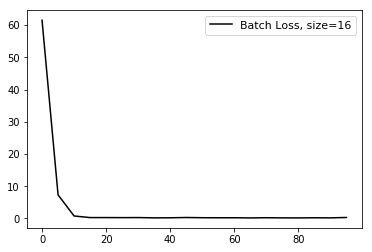

In [8]:
#plt.plot(range(0, 100, 5), loss_st, 'b-', label='Stochastic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'k', label='Batch Loss, size=16')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()